<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Malayalam/ULMFiT_Malayalam_translated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/mal_final.csv')
train1

,Unnamed: 0,Unnamed: 0.1,text,category,trans,translation
0,0,0,Sunny chechi fans evide like adichu power kani...,unknown_state,{'ml': 'സുന്നി ചെച്ചി ഫാൻസ് എവിടെ ലൈക് അടിച്ച്...,"Sunny Cheung francs, 1992."
1,1,1,Angane july month ile ende aadyathe leave njan...,Positive,{'ml': 'അങ്ങനെ ജൂലൈ മോന്ത് എലി എന്ടെ ആദ്യത്തെ ...,"So, July, July 5th, July 5th, I'm on my first ..."
2,2,2,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...,unknown_state,{'ml': 'ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിര...,Those waiting for my brother's new show---
3,3,3,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........,Positive,{'ml': 'ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്ന...,"Now, I'm going to begin the hunt of Laeddis......"
4,4,4,Trailer powli oru raksha illa . Pakshea padam ...,Positive,{'ml': 'ട്രൈലർ പോളി ഒരു രക്ഷ ഇല്ല . പക്ഷീ പദം ...,The trilom system has no escape.
...,...,...,...,...,...,...
15883,15883,15883,Minimum 10 thavana kandavar maathram like adi,unknown_state,{'ml': 'മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി'},Only those who have seen 10 times have a license.
15884,15884,15884,Please cinema kaannaaan kothi aakunnu onnu rel...,Positive,{'ml': 'പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന...,"Please, let's just sign the film. Please."
15885,15885,15885,USA ok.. India No... Sadhacharam,unknown_state,{'ml': 'ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം'},Good-bye!
15886,15886,15886,nama hero december 12 wait & see mamamaga mah...,Positive,{'ml': 'നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ ...,The date of December 12 of the 12th Cygm 3 Cyg...


In [3]:
for i in range(len(train1)):
  if train1['category'][i]=='not-malayalam':
    train1['translation'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
train=pd.DataFrame(columns=['category','text'])
train['category']=train1['category'].append(train1['category'])
train['text']=train1['text'].append(train1['translation'])
train

,category,text
0,unknown_state,Sunny chechi fans evide like adichu power kani...
1,Positive,Angane july month ile ende aadyathe leave njan...
2,unknown_state,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3,Positive,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4,Positive,Trailer powli oru raksha illa . Pakshea padam ...
...,...,...
15883,unknown_state,Only those who have seen 10 times have a license.
15884,Positive,"Please, let's just sign the film. Please."
15885,unknown_state,Good-bye!
15886,Positive,The date of December 12 of the 12th Cygm 3 Cyg...


In [5]:
train=train.dropna()

In [6]:
val=pd.read_csv('/content/Mal_sentiment_full_test_withlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,id,text,category
0,Mal_1,Teaserinu kurach samayamkoodi mathram. Cant wa...,Positive
1,Mal_2,അപ്പോൾ കഥയുടെ റൂട്ട് മാറിയല്ലോ...,unknown_state
2,Mal_3,മൂത്തോൻ ട്രൈലെർ Trending List വരാത്തത് എന്താ ?,unknown_state
3,Mal_4,Nowadays 944k views is considered as 1M views ...,not-malayalam
4,Mal_5,Maass.trailer ennu paranja ithaanU makkale.......,Positive
...,...,...,...
1957,Mal_1958,Expression വച്ചു നോക്കുമ്പോൾ മൂക്കുത്തി കട്ടത്...,unknown_state
1958,Mal_1959,എനിക്ക് ഒരു 100 like തരുമോ,unknown_state
1959,Mal_1960,Nannayi onnu poliyunna lakshnm unde...Thrill m...,Negative
1960,Mal_1961,Athikam eduthu kayatti vekkenda....direction k...,Mixed_feelings


In [7]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [8]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [9]:
punc(df)
punc(df_test)

             category                                               text
0       unknown_state  Sunny chechi fans evide like adichu power kani...
1            Positive  Angane july month ile ende aadyathe leave njan...
2       unknown_state  ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3            Positive  ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4            Positive  Trailer powli oru raksha illa . Pakshea padam ...
...               ...                                                ...
15883   unknown_state  Only those who have seen 10 times have a license.
15884        Positive          Please, let's just sign the film. Please.
15885   unknown_state                                          Good-bye!
15886        Positive  The date of December 12 of the 12th Cygm 3 Cyg...
15887  Mixed_feelings  King Horsey 1 Ryreus 40 riys, 1 riek Leiser, 4...

[31770 rows x 2 columns]
            category                                               text
0           Positive  Teas

In [10]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [11]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [12]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (31770 items)
x: LMTextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു xxunk xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal xxunk,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1962 items)
x: LMTextList
xxbos xxmaj teaserinu kurach xxunk mathram . xxmaj ca nt wait ..,xxbos അപ്പോൾ കഥയുടെ xxunk xxunk ...,xxbos മൂത്തോൻ ട്രൈലെർ xxmaj trending xxmaj list xxunk എന്താ ?,xxbos xxmaj xxunk xxunk views is xxunk as 1 m views in kerala,xxbos xxmaj xxunk ennu paranja ithaanu makkale xxrep 5 . katta waiting for xxmaj lucifer
y: LMLabelList
,,,,
Path: .;

Test: None>

In [13]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.01E-02
Min loss divided by 10: 5.01E-02


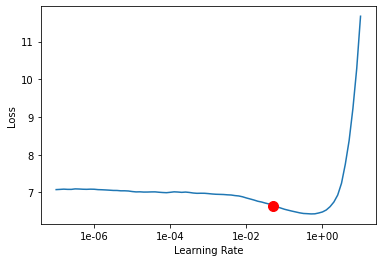

In [14]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)

In [15]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,4.982058,5.142865,0.280580,00:20
1,4.135139,4.860070,0.299936,00:21


In [16]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.845334,4.785529,0.300957,00:27
1,3.577558,4.562455,0.323469,00:28
2,2.879608,4.667787,0.322353,00:28


In [17]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-03
Min loss divided by 10: 8.32E-05


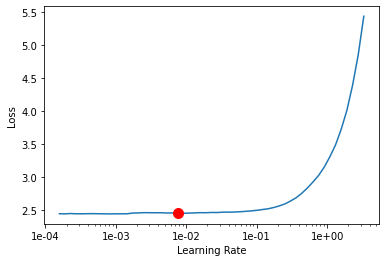

In [18]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [19]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.542325,4.726287,0.319483,00:22
1,2.428990,4.744110,0.320504,00:22
2,2.176902,4.755569,0.321684,00:22


In [20]:
learn.freeze_to(-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-03
Min loss divided by 10: 1.58E-05


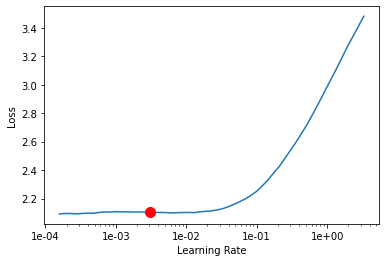

In [21]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [22]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.177041,4.925755,0.315019,00:23
1,2.097550,4.969975,0.313776,00:23
2,1.890891,5.026531,0.313967,00:23


In [23]:
#save the encoder model
learn.save_encoder('my_encoder')

In [24]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [25]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31770 items)
x: TextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു xxunk xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal xxunk,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: CategoryList
unknown_state,Positive,unknown_state,Positive,Positive
Path: .;

Valid: LabelList (1962 items)
x: TextList
xxbos xxmaj teaserinu kurach xxunk mathram . xxmaj ca nt wait ..,xxbos അപ്പോൾ കഥയുടെ xxunk xxunk ...,xxbos മൂത്തോൻ ട്രൈലെർ xxmaj trending xxmaj list xxunk എന്താ ?,xxbos xxmaj xxunk xxunk views is xxunk as 1 m views in kerala,xxbos xxmaj xxunk ennu paranja ithaanu makkale xxrep 5 . katta waiting for xxmaj lucifer
y: CategoryList
Positive,unknown_state,

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 1.74E-02


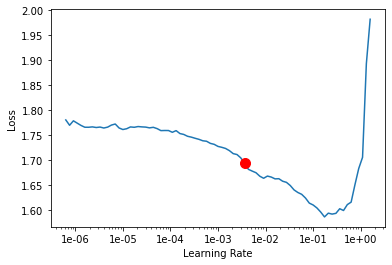

In [26]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [27]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.171456,1.124772,0.558104,0.333794,00:18
1,1.108924,1.007037,0.602956,0.494280,00:18
2,1.092125,1.000268,0.599898,0.489832,00:16


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

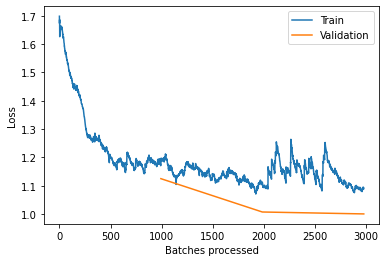

In [28]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 3.63E-06


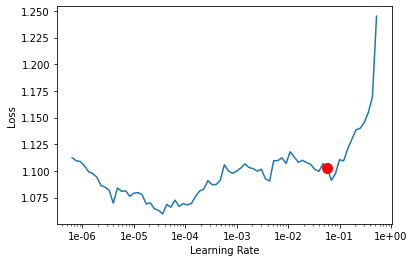

In [29]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [30]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.039051,0.965595,0.617227,0.479612,00:21
1,1.006594,0.934452,0.630989,0.542404,00:19


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06
Min loss divided by 10: 6.31E-08


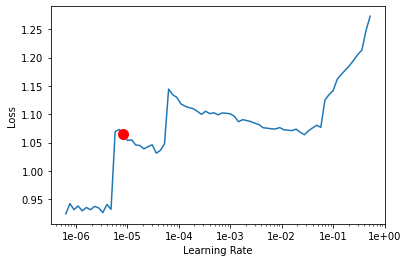

In [31]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [32]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.015301,0.910249,0.637105,0.534003,00:33
1,0.854075,0.864024,0.658512,0.587638,00:32


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [33]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.843381,0.865872,0.661060,0.557411,00:43
1,0.697587,0.877601,0.675841,0.610836,00:43


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.694596,0.862305,0.685015,0.600554,00:49
1,0.538528,0.868630,0.689602,0.628549,00:49


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.477270,0.892664,0.687054,0.620346,00:48
1,0.445481,0.915804,0.684506,0.623895,00:44
2,0.403720,0.925789,0.690112,0.633485,00:45


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [34]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [35]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,41,12,7,1,9
1,20,135,26,3,45
2,40,54,615,22,109
3,3,2,19,109,26
4,30,55,113,12,454


In [36]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[ 41  12   7   1   9]
 [ 20 135  26   3  45]
 [ 40  54 615  22 109]
 [  3   2  19 109  26]
 [ 30  55 113  12 454]]
0.6901121304791029


In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.3060    0.5857    0.4020        70
           1     0.5233    0.5895    0.5544       229
           2     0.7885    0.7321    0.7593       840
           3     0.7415    0.6855    0.7124       159
           4     0.7061    0.6837    0.6947       664

    accuracy                         0.6901      1962
   macro avg     0.6130    0.6553    0.6246      1962
weighted avg     0.7086    0.6901    0.6970      1962

